## Understanding P20 probe response

### Conduino measurements
Only P20 probe was connected.

#### Homogeneous water column 

$\rho=1.007536$ at 20.001 $^{\circ}$C at 3:30 pm

Base readings - probe not moving

Profiles - using profiler

Test 02 had a weird thing: CH4 was the one measuring even though nothing was connected to it! WHAT?!

The tip of the probe always comes out of the water because the distance it travels is fixed by the length of the arm in the profiler and that is longer than the probe by 0.5 cm. I will need to fix that and porbably get a slower motor so that I can use full motor power without having faster profiles.

|Code|Description|file|time (pm)|
|:-:|:-------:|:--:|:--:|
|01|Base reading - air|01_P20_air.mat|3:56|
|02|Normal profile|02_P20_profile.mat||
|03|Normal profile|03_P20_profile2.mat||
|04|Profile - soak 10 s|04_P20_profile_soak.mat||
|05|Profile - soaking from the beginning|05_P20_profile_soak2.mat||
|06|Repeat of 5 after mixing water|06_P20_profile_soak3.mat||
|07|P20 as deep as can go - tip still goes out but 20%underwater|07_P20_profile_soak4.mat||
|08|Soaking at bottom - same config as 7|08_P20_profile_soak5.mat||
|09|Moving P20 by hand to keep tip below water|09_P20_profile_soak6.mat||
|10|Base reading at mid depth|10_P20_middepth.mat||
|11|Repeat of 9 - not touching bottom|11_P20_profile_soak7.mat||
|12|Slower profiler, soak at the beginning|12_P20_profile_soak8.mat||


#### Stratified water column

800 g salt to bucket 1, but added 2 liters of water to each bucket to see it that is enought to avoid tilting B2 during last bit of filling.

$\rho_1=1.02702$ at 20.000 C

$\rho_2=0.998576$ at 20.008 C



In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import scipy.io as sio
import sys
sys.path.append('/ocean/kramosmu/MultipleCanyons/lab/Conduino/scripts')
import conduino_tools as ctools
import profiler_tools as ptools

In [2]:
sns.set_style('whitegrid')
sns.set_context('notebook')

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [4]:
def plot_cases(filepaths,labels, strat=False, ini_dens=1.007536):
    fig, (ax0,ax1) = plt.subplots(2,1, figsize=(10,8), sharex=True)
    
    if strat==False:
        ax1.axhline(ini_dens, color='coral', label='density measurment')
    else:
        ax1.axhline(1.00904, color='coral')
        ax1.axhline(1.02602, color='coral', label='density measurment')
    
    sns.set_palette(sns.cubehelix_palette(len(filepaths), start=.5, rot=-.75))
    for filepath, lab in zip(filepaths, labels):
        mat = sio.loadmat(filepath, squeeze_me=True)
        P3 = mat['ch3']
        D3 = ctools.densP_12Jul19(P3)
        time = mat['time']
        ax0.plot(time,P3,'.-', label=lab)
        ax1.plot(time,D3,'.-', label=lab)

    ax0.legend(bbox_to_anchor=(1,1))
    ax1.legend(bbox_to_anchor=(1,1))

    ax0.set_ylabel('reading')
    ax1.set_ylabel('density / g cm$^{-3}$')
    ax0.set_title('P20')
    ax1.set_xlabel('time / s')
    plt.tight_layout()
    return ax0,ax1

Probes P20 profiler

|Channel|Probe|
|::|::|
|'ch3':|P20|


## Homogeneous watercolumn
### All measurements

Text(0.5,0,'time / s')

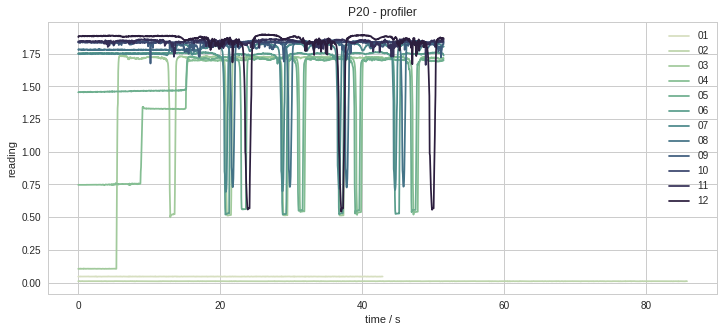

In [26]:
fig, (ax0) = plt.subplots(1,1, figsize=(12,5), sharex=True)

labels = ['01','02','03','04','05','06','07','08','09','10','11','12'] 
   
filepaths = ['../probe_characterization_17jul19/01_P20_air.mat',
             '../probe_characterization_17jul19/02_P20_profile.mat',
             '../probe_characterization_17jul19/03_P20_profile2.mat',
             '../probe_characterization_17jul19/04_P20_profile_soak.mat',
             '../probe_characterization_17jul19/05_P20_profile_soak2.mat',
             '../probe_characterization_17jul19/06_P20_profile_soak3.mat',
             '../probe_characterization_17jul19/07_P20_profile_soak4.mat',
             '../probe_characterization_17jul19/08_P20_profile_soak5.mat',
             '../probe_characterization_17jul19/09_P20_profile_soak6.mat',
             '../probe_characterization_17jul19/10_P20_middepth.mat',
             '../probe_characterization_17jul19/11_P20_profile_soak7.mat',
             '../probe_characterization_17jul19/12_P20_profile_soak8.mat',
            ]

sns.set_palette(sns.cubehelix_palette(len(filepaths), start=.5, rot=-.75))
for filepath, lab in zip(filepaths, labels):
    mat = sio.loadmat(filepath, squeeze_me=True)
    P3 = mat['ch3']
    time = mat['time']
    ax0.plot(time,P3, label=lab)
    
ax0.legend(bbox_to_anchor=(1,1))

ax0.set_ylabel('reading')#'density / g cm$^{-3}$')
ax0.set_title('P20 - profiler')
ax0.set_xlabel('time / s')

### Base readings

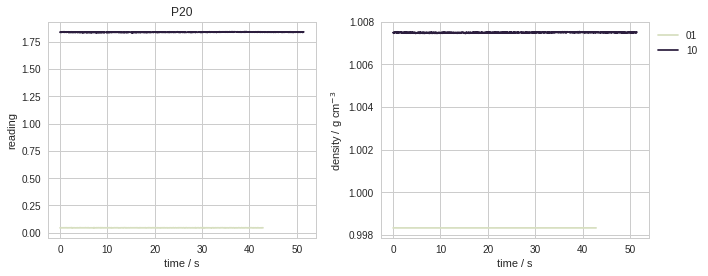

In [28]:
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(10,4), sharex=True)

labels = ['01','10'] 
   
filepaths = ['../probe_characterization_17jul19/01_P20_air.mat',
             '../probe_characterization_17jul19/10_P20_middepth.mat',
            ]

sns.set_palette(sns.cubehelix_palette(len(filepaths), start=.5, rot=-.75))
for filepath, lab in zip(filepaths, labels):
    mat = sio.loadmat(filepath, squeeze_me=True)
    P3 = mat['ch3']
    D3 = ctools.densP_12Jul19(P3)
    
    time = mat['time']
    ax0.plot(time,P3, label=lab)
    ax1.plot(time,D3, label=lab)
    
ax1.legend(bbox_to_anchor=(1,1))

ax0.set_ylabel('reading')
ax1.set_ylabel('density / g cm$^{-3}$')

ax0.set_title('P20')
ax0.set_xlabel('time / s')
ax1.set_xlabel('time / s')
plt.tight_layout()

### Profiles
**Soaking top**

Soaking is important but it is more important to keep the tip of the probe (whole electrodes) underwater at all time. I will need to adjust (cut) the arm of the porfiler to get shorter profiles without the probe smashing the bottom.

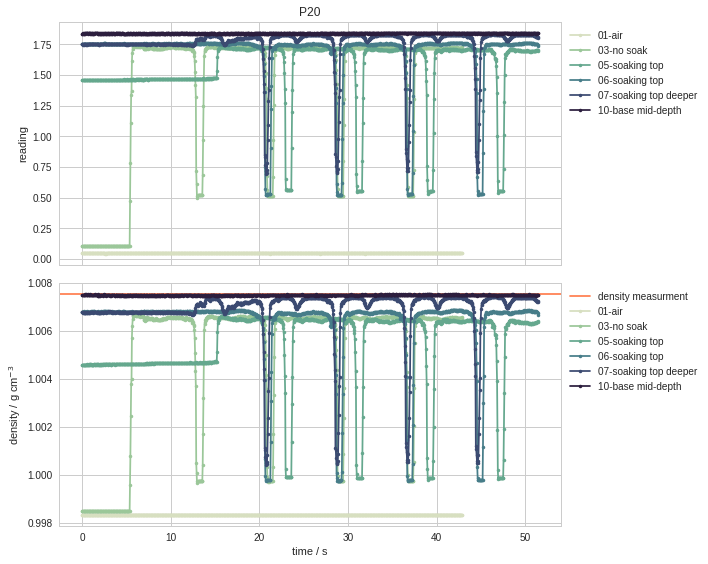

In [30]:
labels = ['01-air','03-no soak','05-soaking top','06-soaking top',
          '07-soaking top deeper','10-base mid-depth'] 
   
filepaths = ['../probe_characterization_17jul19/01_P20_air.mat',
             '../probe_characterization_17jul19/03_P20_profile2.mat',
             '../probe_characterization_17jul19/05_P20_profile_soak2.mat',
             '../probe_characterization_17jul19/06_P20_profile_soak3.mat',
             '../probe_characterization_17jul19/07_P20_profile_soak4.mat',
             '../probe_characterization_17jul19/10_P20_middepth.mat',
             ]

ax0,ax1 = plot_cases(filepaths, labels)

**Soaking at bottom vs. soaking at top**
* Not much difference except that base reading for soaking at the bottom is a bit larger. I think that in both of these tests the probe got too close to bottom because there are a couple of bulges in the readings when the probe is at the deepest part. Those bulges did not appear when the probe was slightly shallower (plots above for 03, 05, 06).

* Having the probe's tip below surface keeps readings at top part of cycle smaller.

* I don't understand why the initial reading of 08-soaking ta bottom is not the same or larger (in case water was not well mixed) than 10-base reading at mid-depth.

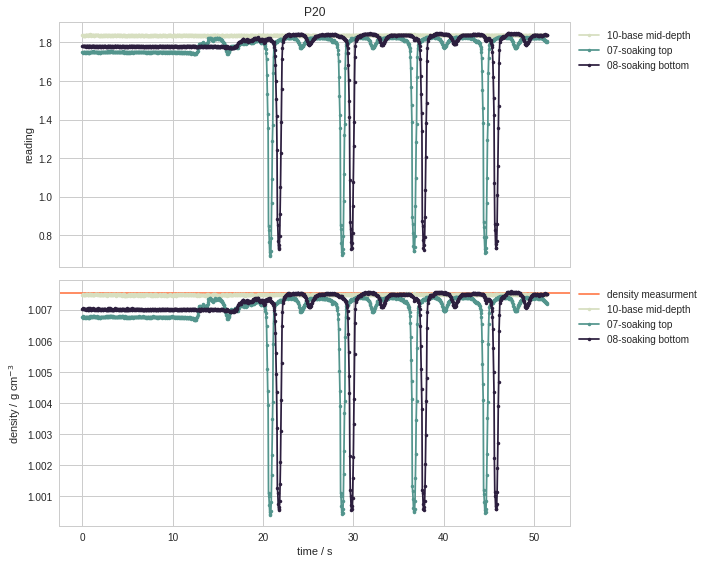

In [32]:
labels = ['10-base mid-depth','07-soaking top','08-soaking bottom'] 
   
filepaths = ['../probe_characterization_17jul19/10_P20_middepth.mat',
             '../probe_characterization_17jul19/07_P20_profile_soak4.mat',
             '../probe_characterization_17jul19/08_P20_profile_soak5.mat',
             ]

ax0,ax1 = plot_cases(filepaths, labels)

**Profiler speed**

A slow profiler allows lower readings at surface and higher readings at bottom but it does not have enough power to move smoothly, and measurements are noisy.


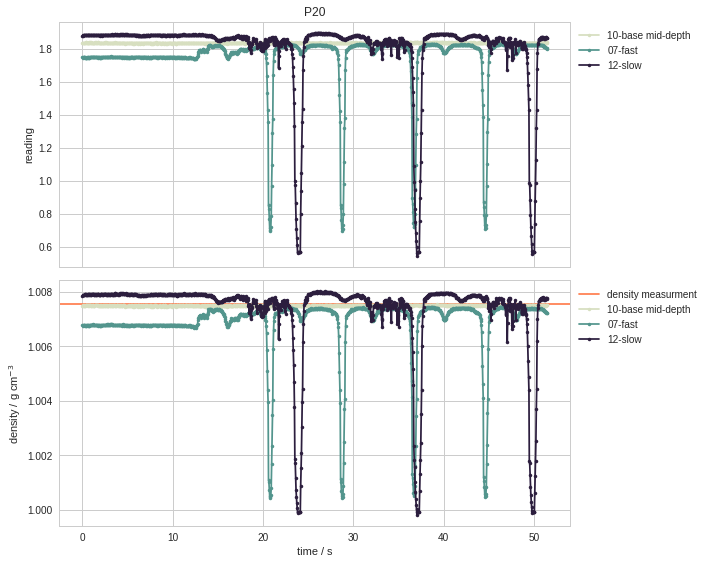

In [34]:
labels = ['10-base mid-depth','07-fast','12-slow'] 
   
filepaths = ['../probe_characterization_17jul19/10_P20_middepth.mat',
             '../probe_characterization_17jul19/07_P20_profile_soak4.mat',
             '../probe_characterization_17jul19/12_P20_profile_soak8.mat',
             ]

ax0,ax1 = plot_cases(filepaths, labels)

**Manual profiles**

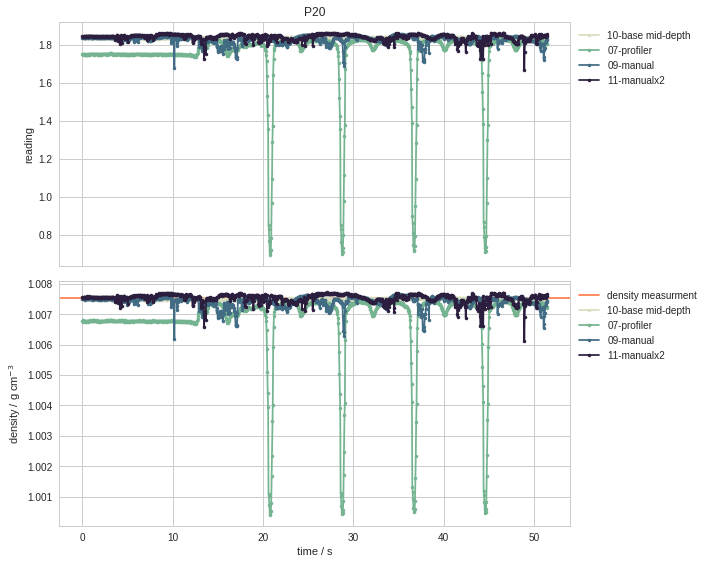

In [36]:
labels = ['10-base mid-depth','07-profiler','09-manual','11-manualx2'] 
   
filepaths = ['../probe_characterization_17jul19/10_P20_middepth.mat',
             '../probe_characterization_17jul19/07_P20_profile_soak4.mat',
             '../probe_characterization_17jul19/09_P20_profile_soak6.mat',
             '../probe_characterization_17jul19/11_P20_profile_soak7.mat',
             ]

ax0,ax1 = plot_cases(filepaths, labels)

## Stratified watercolumn
### All measurements
Maximum density from readings is a lot higher that the highest density in the tank (bottom density is 1.026 g/cm$^3$)

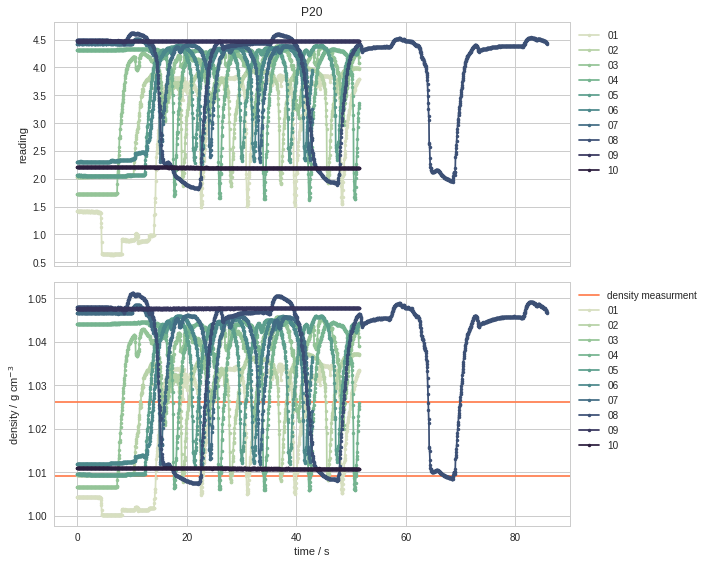

In [38]:
labels = ['01','02','03','04','05','06','07','08','09','10'] 
 
filepaths = ['../probe_characterization_17jul19/01_profileN.mat',
             '../probe_characterization_17jul19/02_profileN_soaking.mat',
             '../probe_characterization_17jul19/03_profileN_soaking2.mat',
             '../probe_characterization_17jul19/04_profileN_soaking3.mat',
             '../probe_characterization_17jul19/05_profileN_soaking4.mat',
             '../probe_characterization_17jul19/06_profileN_soaking5.mat',
             '../probe_characterization_17jul19/07_profileN_soaking6.mat',
             '../probe_characterization_17jul19/08_profileN_soaking7.mat',
             '../probe_characterization_17jul19/09_baseN.mat',
             '../probe_characterization_17jul19/10_baseN_top.mat'
             ]

ax0,ax1 = plot_cases(filepaths, labels, strat=True)           

Soaking at bottom vs. top

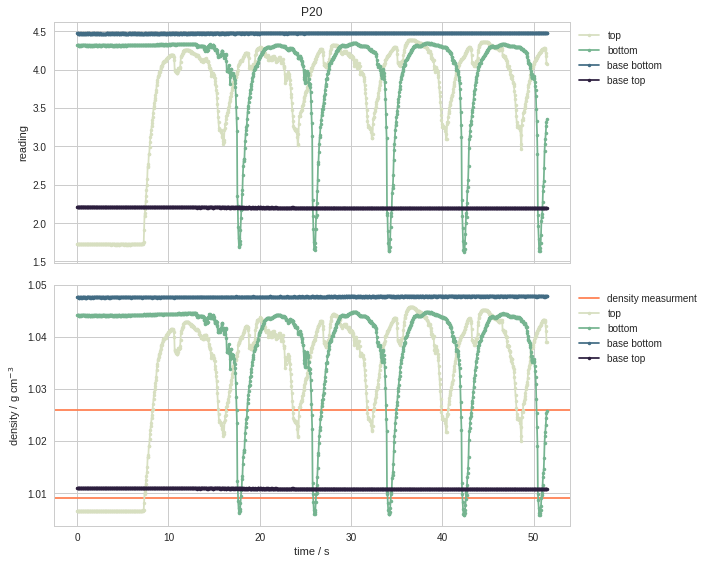

In [40]:
labels = ['top','bottom','base bottom','base top'] 
 
filepaths = ['../probe_characterization_17jul19/03_profileN_soaking2.mat',
             '../probe_characterization_17jul19/04_profileN_soaking3.mat',
             '../probe_characterization_17jul19/09_baseN.mat',
             '../probe_characterization_17jul19/10_baseN_top.mat'
             ]

ax0,ax1 = plot_cases(filepaths, labels, strat=True)           

**Slower profiler**

Better profiles with slower profiler, it is not that much slower but enough to have good motor power.

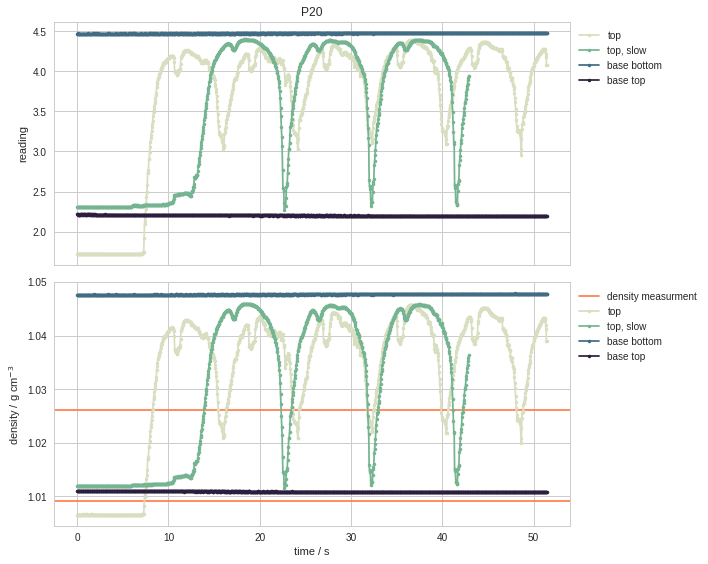

In [42]:
labels = ['top','top, slow','base bottom','base top'] 
 
filepaths = ['../probe_characterization_17jul19/03_profileN_soaking2.mat',
             '../probe_characterization_17jul19/06_profileN_soaking5.mat',
             '../probe_characterization_17jul19/09_baseN.mat',
             '../probe_characterization_17jul19/10_baseN_top.mat'
             ]

ax0,ax1 = plot_cases(filepaths, labels, strat=True)           

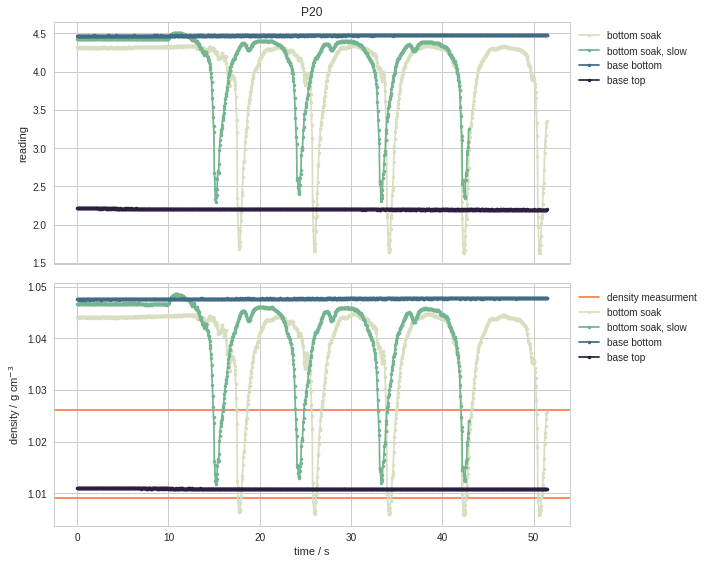

In [43]:
labels = ['bottom soak','bottom soak, slow','base bottom','base top'] 
 
filepaths = ['../probe_characterization_17jul19/04_profileN_soaking3.mat',
             '../probe_characterization_17jul19/07_profileN_soaking6.mat',
             '../probe_characterization_17jul19/09_baseN.mat',
             '../probe_characterization_17jul19/10_baseN_top.mat'
             ]

ax0,ax1 = plot_cases(filepaths, labels, strat=True)           

**Soaking at top and bottom every profile**

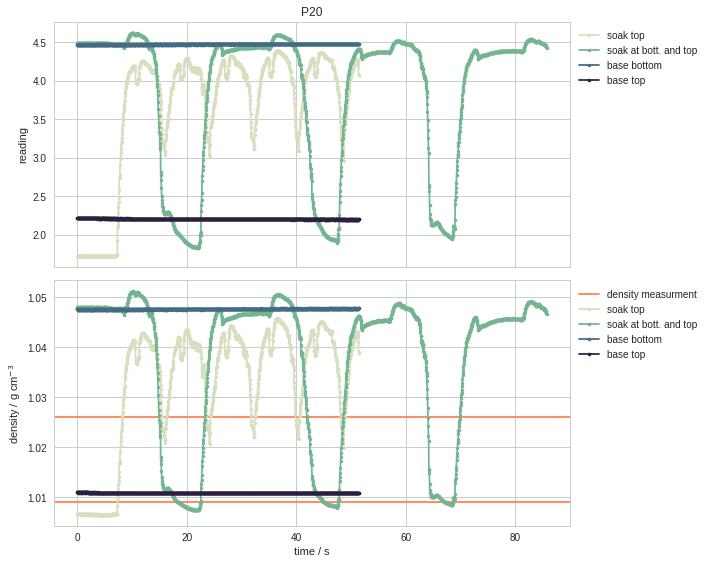

In [45]:
labels = ['soak top','soak at bott. and top','base bottom','base top'] 
 
filepaths = ['../probe_characterization_17jul19/03_profileN_soaking2.mat',
             '../probe_characterization_17jul19/08_profileN_soaking7.mat',
             '../probe_characterization_17jul19/09_baseN.mat',
             '../probe_characterization_17jul19/10_baseN_top.mat'
             ]

ax0,ax1 = plot_cases(filepaths, labels, strat=True)           

### Shorter profiler

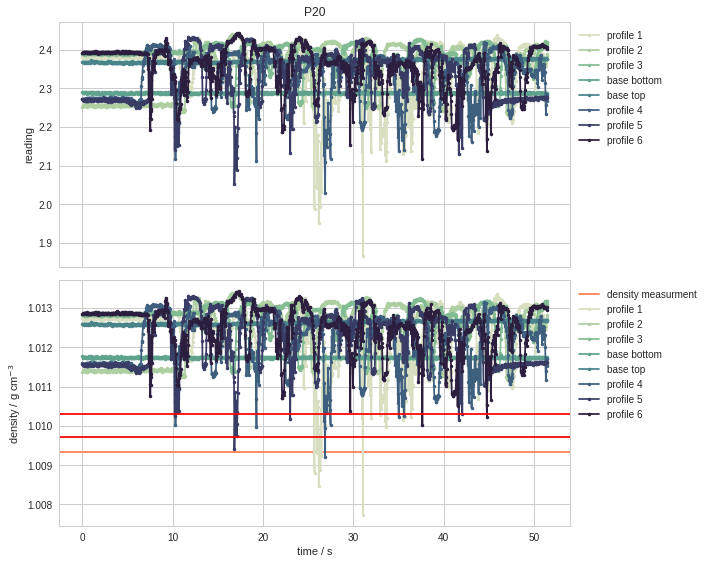

In [47]:
labels = ['profile 1','profile 2','profile 3','base bottom','base top',
          'profile 4','profile 5','profile 6'] 
 
filepaths = ['../probe_characterization_18jul19/01_P20_profile.mat',
             '../probe_characterization_18jul19/02_P20_profile2.mat',
             '../probe_characterization_18jul19/03_P20_profile3.mat',
             '../probe_characterization_18jul19/04_P20_base_bottom.mat',
             '../probe_characterization_18jul19/05_P20_base_top.mat',
             '../probe_characterization_18jul19/06_P20_profile4.mat',
             '../probe_characterization_18jul19/07_P20_profile5.mat',
             '../probe_characterization_18jul19/08_P20_profile6.mat',
             ]

ax0,ax1 = plot_cases(filepaths, labels, strat=False, ini_dens=1.00934)  
ax1.axhline(1.00972, color='red')
ax1.axhline(1.0103, color='red')

**Profiler velocity**

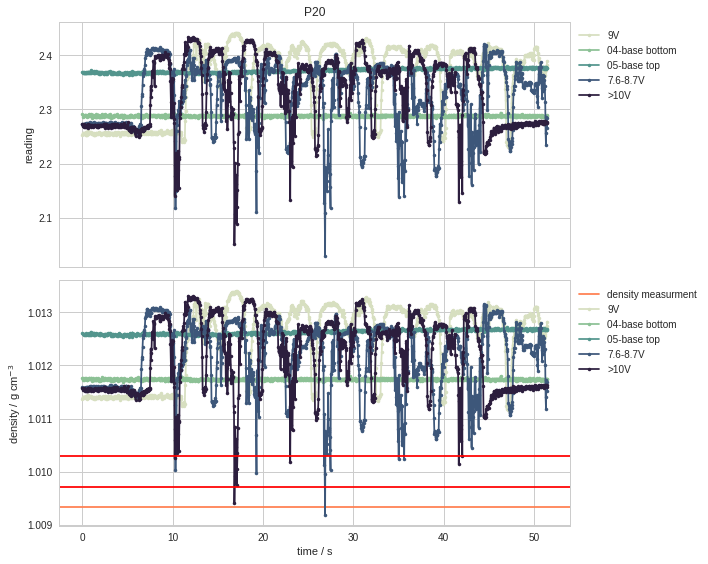

In [49]:
labels = ['9V','04-base bottom','05-base top',
          '7.6-8.7V','>10V'] 
 
filepaths = ['../probe_characterization_18jul19/02_P20_profile2.mat',
             '../probe_characterization_18jul19/04_P20_base_bottom.mat',
             '../probe_characterization_18jul19/05_P20_base_top.mat',
             '../probe_characterization_18jul19/06_P20_profile4.mat',
             '../probe_characterization_18jul19/07_P20_profile5.mat',
             ]

ax0,ax1 = plot_cases(filepaths, labels, strat=False, ini_dens=1.00934)  
ax1.axhline(1.00972, color='red')
ax1.axhline(1.0103, color='red')

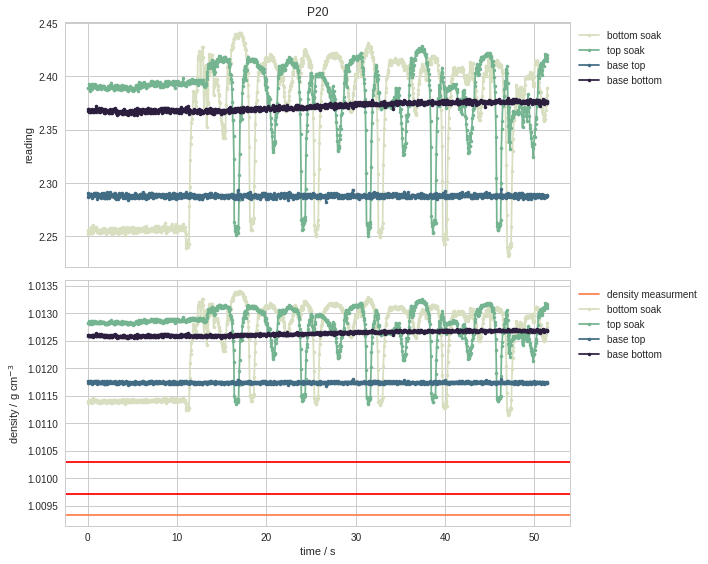

In [51]:
labels = ['bottom soak','top soak', 'base top', 'base bottom'] 
 
filepaths = [
             '../probe_characterization_18jul19/02_P20_profile2.mat',
             '../probe_characterization_18jul19/03_P20_profile3.mat', 
             '../probe_characterization_18jul19/04_P20_base_bottom.mat',
             '../probe_characterization_18jul19/05_P20_base_top.mat',
             ]

ax0,ax1 = plot_cases(filepaths, labels, strat=False, ini_dens=1.00934)  
ax1.axhline(1.00972, color='red')
ax1.axhline(1.0103, color='red')